<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [743]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sb
import matplotlib.pyplot as pt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [744]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [745]:
df = pd.read_csv("/content/drive/MyDrive/ipynb/datasets/spam.csv",\
                 encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(6)

,target,text
3862,spam,Oh my god! I've found your number again! I'm s...
720,ham,Oh is it? Send me the address
1800,ham,excellent. I spent &lt;#&gt; years in the Ai...
4382,ham,No need lar i go engin? Cos my sis at arts tod...
2087,ham,\alright babe
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."


In [746]:
df.iloc[3585][1]

'I am hot n horny and willing I live local to you - text a reply to hear strt back from me 150p per msg Netcollex LtdHelpDesk: 02085076972 reply Stop to end'

In [747]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

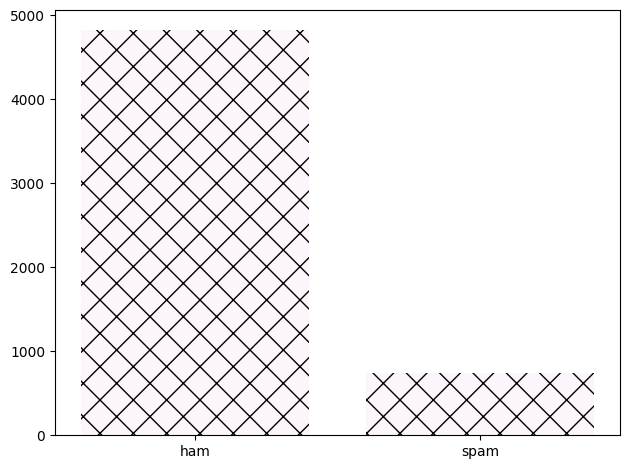

In [748]:
pt.bar(['ham', 'spam'], df['target'].value_counts(), color='orchid',\
       hatch='x', alpha=0.06)
pt.tight_layout();

In [749]:
def clean(text):
  sms = re.sub('[^a-zA-Z]', ' ', text) #Replacing all non-alphabetic characters with a space
  sms = sms.lower() #converting to lowecase
  sms = sms.split()
  sms = ' '.join(sms)
  return sms

In [750]:
df['text'] = df['text'].apply(clean)

In [751]:
df['text'].sample(6)

4050    motivate behind every darkness there is a shin...
3804    dude while were makin those weirdy brownies my...
3699                    oh i asked for fun haha take care
1261    thank you so much when we skyped wit kz and su...
510     at the latest g s still there if you can scrou...
1909                        then u going ikea str aft dat
Name: text, dtype: object

In [752]:
df["text"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1)

In [753]:
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  filtered_text = [word for word in text if word not in stop_words]
  return filtered_text

In [754]:
df['text'] = df['text'].apply(remove_stopwords)

In [755]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
  lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
  return lemmas
df["text"] = df["text"].apply(lemmatize_word)

In [756]:
df

,target,text
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, live, around, though]"
...,...,...
5567,spam,"[nd, time, try, contact, u, u, pound, prize, c..."
5568,ham,"[b, go, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitch, act, like, interest, buy, somethi..."


In [757]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['target'])

In [758]:
p_spam = len(x_train[y_train=='spam'])/len(x_train)
p_ham = len(x_train[y_train=='ham'])/len(x_train)

In [759]:
x_train[6]

['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']

In [760]:
len(x_train) == len(y_train)

True

In [761]:
n_spam = 0
for i in x_train.index:
  if(y_train[i] == 'spam'):
    n_spam += len(x_train[i])
n_spam

8952

In [762]:
n_ham = 0
for i in x_train.index:
  if(y_train[i] == 'ham'):
    n_ham += len(x_train[i])
n_ham

28892

In [763]:
n = int(n_ham/n_spam)
n

3

In [764]:
ham_index = x_train[y_train=='ham'].index
spam_index = x_train[y_train=='spam'].index

In [765]:
p = {}
q = {}
for i in spam_index:
  for j in x_train[i]:
    try:
      p[j] += 1
    except:
      p[j] = 1
for i in ham_index:
  for j in x_train[i]:
    try:
      q[j] += 1
    except:
      q[j] = 1

In [766]:
p.update((key, value*n) for key, value in p.items())

In [767]:
def check(sample):
  try:  #custom check
    sample = sample.lower()
    sample = sample.split()
  except:
    sample
  malt_spam = p_spam
  malt_ham = p_ham
  for i in range(len(sample)):
    valp = p.get(sample[i], n)
    valq = q.get(sample[i], 1)
    malt_spam = malt_spam*valp
    malt_ham = malt_ham*valq
    if(malt_spam>999999 or malt_ham>999999):
      malt_spam /= 1000000
      malt_ham /= 1000000
  if(malt_spam>malt_ham):
    return 'spam'
  else:
    return 'ham'

In [768]:
def predict(x_test):
  y_pred = []
  for x in x_test:
    y_pred.append(check(x))
  return y_pred

In [769]:
y_pred = predict(x_test)
y_pred[:6]

['ham', 'ham', 'ham', 'ham', 'ham', 'ham']

In [770]:
y_test[:6]

477     ham
3749    ham
1938    ham
3924    ham
658     ham
271     ham
Name: target, dtype: object

In [771]:
def accuracy(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i] == y_pred[i]):
      c += 1
  return c/len(y_test)

In [772]:
acc = accuracy(y_test, y_pred)*100
print(f'accuracy is {acc:.3f}%')

accuracy is 95.262%


In [773]:
def TP(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='ham' and y_pred[i]=='ham'):
      c += 1
  return c
def TN(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='spam' and y_pred[i]=='spam'):
      c += 1
  return c
def FP(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='spam' and y_pred[i]=='ham'):
      c += 1
  return c
def FN(y_test, y_pred):
  c = 0
  y_test = y_test.reset_index()
  y_test.drop(['index'], axis=1, inplace=True)
  for i in range(len(y_pred)):
    if(y_test['target'][i]=='ham' and y_pred[i]=='spam'):
      c += 1
  return c

In [774]:
tp = TP(y_test, y_pred)
fp = FP(y_test, y_pred)
tn = TN(y_test, y_pred)
fn = FN(y_test, y_pred)

In [775]:
def confusion_matrix(tp, tn, fp, fn):
  print('     ham','\t','spam')
  print('ham ',tp, '\t', fn)
  print()
  print('spam',fp, '\t\t', tn)

In [776]:
confusion_matrix(tp, tn, fp, fn)

     ham 	 spam
ham  1157 	 60

spam 6 		 170


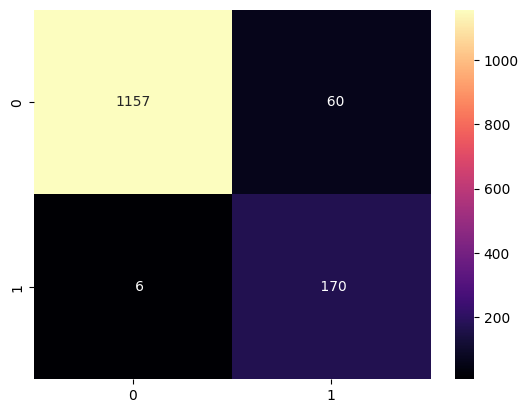

In [777]:
sb.heatmap([[tp, fn],[fp,tn]], annot=True, fmt='4', cmap='magma');

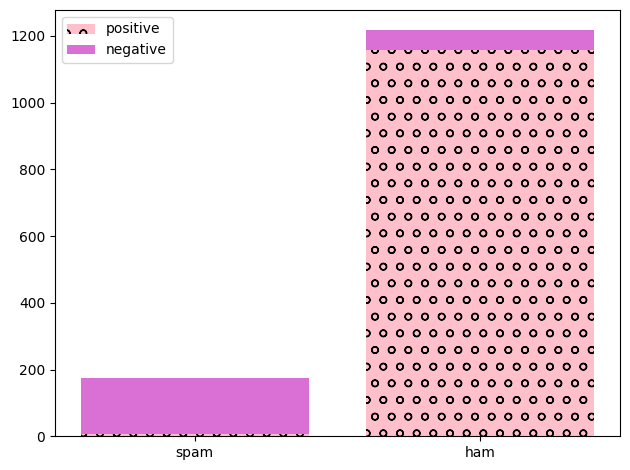

In [778]:
pt.bar(['spam','ham'], [fp, tp], color='pink', hatch='o')
pt.bar(['spam', 'ham'], [tn, fn], bottom=[fp, tp], color='orchid')
pt.legend(['positive', 'negative'])
pt.tight_layout();

In [779]:
def metrics(tp, tn, fp, fn):
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = (2*precision*recall)/(precision+recall)
  return precision*100, recall*100, f1*100

In [780]:
pc,r,f = metrics(tp, tn, fp, fn)
print(f'the precision is {pc:.3f}%')
print(f'the recall is    {r:.3f}%')
print(f'the f1-score is  {f:.3f}%')

the precision is 99.484%
the recall is    95.070%
the f1-score is  97.227%


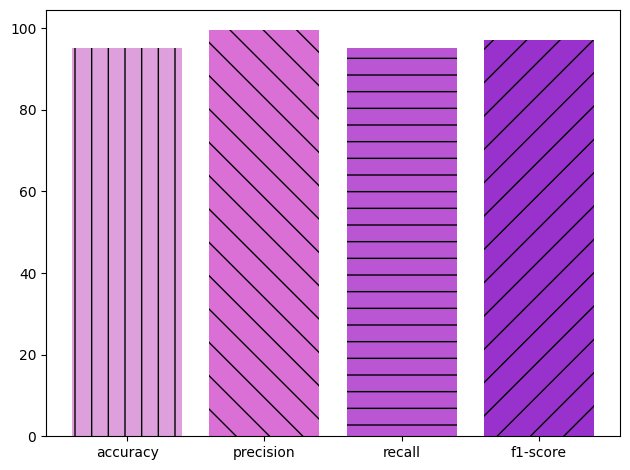

In [781]:
pt.bar(['accuracy','precision', 'recall', 'f1-score'], [acc,pc,r,f],\
       color=['plum','orchid','mediumorchid','darkorchid'], hatch=['|','\\', '-', '/'])
pt.tight_layout();

In [782]:
p = dict(sorted(p.items(), key=lambda x: x[1], reverse=True))
q = dict(sorted(q.items(), key=lambda x: x[1], reverse=True))

In [783]:
print('The top ten most significant words wrt spam are -')
for i,j in list(p.items())[:10]:
  print(i,'(',j,')',end='| ')

The top ten most significant words wrt spam are -
call ( 885 )| free ( 531 )| u ( 429 )| p ( 429 )| txt ( 369 )| ur ( 342 )| mobile ( 303 )| stop ( 297 )| text ( 297 )| claim ( 291 )| 

In [784]:
print('The top ten most significant words wrt ham are -')
for i,j in list(q.items())[:10]:
  print(i,'(',j,')',end='| ')

The top ten most significant words wrt ham are -
u ( 765 )| get ( 458 )| go ( 396 )| come ( 234 )| gt ( 230 )| lt ( 226 )| call ( 222 )| ok ( 208 )| know ( 195 )| like ( 186 )| 

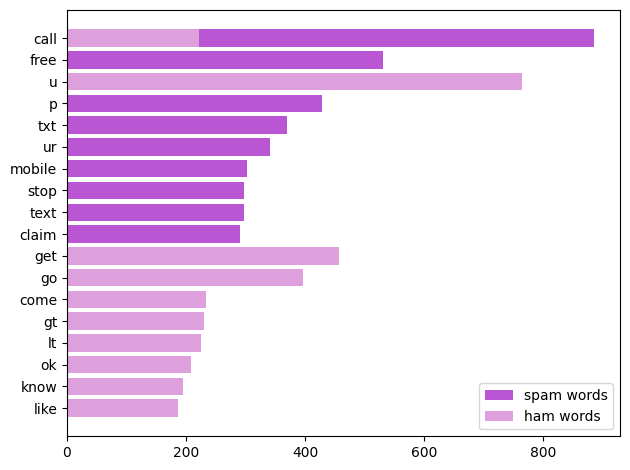

In [785]:
pt.barh(list(p.keys())[:10], list(p.values())[:10], color='mediumorchid')
pt.barh(list(q.keys())[:10], list(q.values())[:10], color='plum')
pt.gca().invert_yaxis()
pt.legend(['spam words', 'ham words'])
pt.tight_layout();